Importing data in the form of binary


In [20]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import binarize
import numpy as np

# Load the digits dataset
digits = load_digits()

# Separate features (X) and target labels (y)
X = digits.data
y = digits.target

# Filter out digits 2, 3, and 4
filtered_indices = np.where((y == 2) | (y == 3) | (y == 4))
X_filtered = X[filtered_indices]
y_filtered = y[filtered_indices]

# Now you have the samples corresponding to digits 2, 3, and 4 in X_filtered and y_filtered
X_binary = binarize(X_filtered)
Pi=np.array([[1/3],[1/3],[1/3]])
P=np.random.random((3,64))
print(X_binary.shape)


(541, 64)


Defining gamma,Pi and P

In [12]:
def f(p,x):
    array_f=(p**x)*((1-p)**(1-x))
    return np.prod(array_f.astype(np.float64))
def gamma(Pi,P,n,X):
    gamma_f=np.empty((n,3))
    for i in range(n):
        denominator=0
        for j in range(3):
            denominator=denominator+Pi[j]*f(P[j],X[i])
        for g in range(3):
            gamma_f[i][g]=(Pi[g]*f(P[g],X[i]))/denominator
    return gamma_f
def Pupdate(gamma_f,X,P,n):
    for j in range(P.shape[0]):
        numerator=0
        denominator=0
        for i in range(n):
            numerator=numerator+gamma_f[i][j]*X[i]
            denominator=denominator+gamma_f[i][j]*X[i]+gamma_f[i][j]*(1-X[i])
        P[j]=numerator/denominator
    return P
def Piupdate(gamma_f,Pi):
    n=gamma_f.shape[0]
    k=gamma_f.shape[1]
    N=0
    for i in range(n):
        for j in range(k):
            N=N+gamma_f[i][j]
    for g in range(k):
        numerator=0
        for i in range(n):
            numerator=numerator+gamma_f[i][g]
        Pi[g]=numerator/N
    return Pi

Doing EM steps

In [13]:

for i in range(2000):
    gamma_f=gamma(Pi,P,541,X_binary)
    P=Pupdate(gamma_f,X_binary,P,541)
    Pi=Piupdate(gamma_f,Pi)
print(Pi)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13172\1442387755.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma_f[i][g]=(Pi[g]*f(P[g],X[i]))/denominator


[[0.28986572]
 [0.38481216]
 [0.32532212]]


Showing the obtained data

In [14]:
import pandas as pd
data=pd.DataFrame(Pi)
data

,0
0,0.289866
1,0.384812
2,0.325322


In [15]:
data2=pd.DataFrame(P)
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.476614,0.952446,0.980869,0.955362,0.376857,0.022217,0.000000,0.006377,0.848412,...,0.902388,0.219396,0.006377,0.426687,0.958203,0.980869,0.974493,0.937449,0.842515,0.287589
1,0.0,0.323074,0.963769,1.000000,1.000000,0.916991,0.223438,0.004803,0.009607,0.691482,...,0.852565,0.084516,0.000000,0.202168,0.949825,1.000000,1.000000,0.960648,0.455747,0.095594
2,0.0,0.000000,0.153406,0.937500,0.994318,0.448866,0.039773,0.017046,0.000000,0.017041,...,0.022727,0.000000,0.000000,0.011364,0.119315,0.897727,0.977273,0.426142,0.000000,0.000000


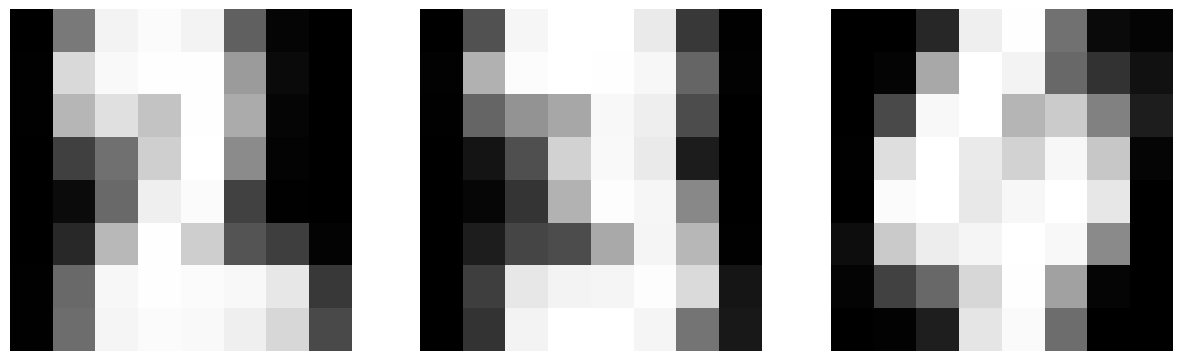

In [16]:
# Visualize results
import matplotlib.pyplot as plt
labels=[2,3,4]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), dpi=100)
for i in range(3):
    ax[i].imshow(P[i].reshape(8,8), cmap='gray')
    # ax[i].set_title('Parameters class: {}\n pi = {:0.3f}'.format(labels[i], Pi[i]), fontsize=3 ** (-1) // 0.02)
    ax[i].axis('off')
plt.show()

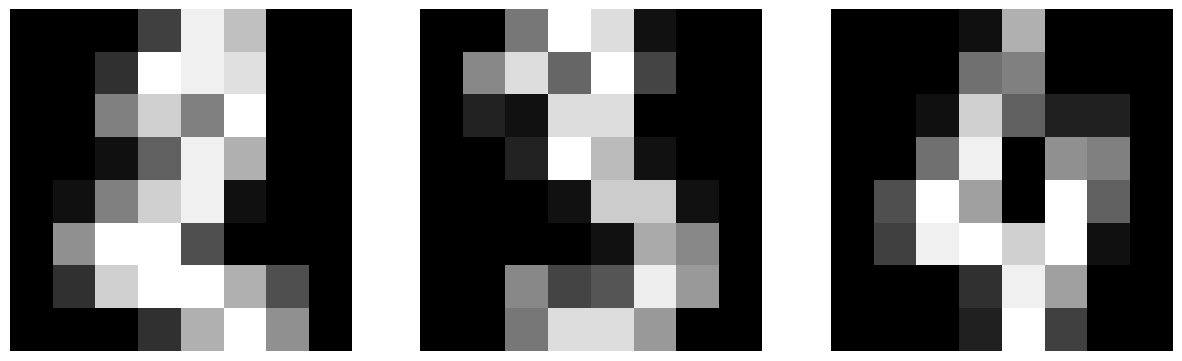

In [17]:
# Visualize results
import matplotlib.pyplot as plt
labels=[2,3,4]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), dpi=100)
for i in range(3):
    ax[i].imshow(X_filtered[i].reshape(8,8), cmap='gray')
    # ax[i].set_title('Parameters class: {}\n pi = {:0.3f}'.format(labels[i], Pi[i]), fontsize=3 ** (-1) // 0.02)
    ax[i].axis('off')
plt.show()

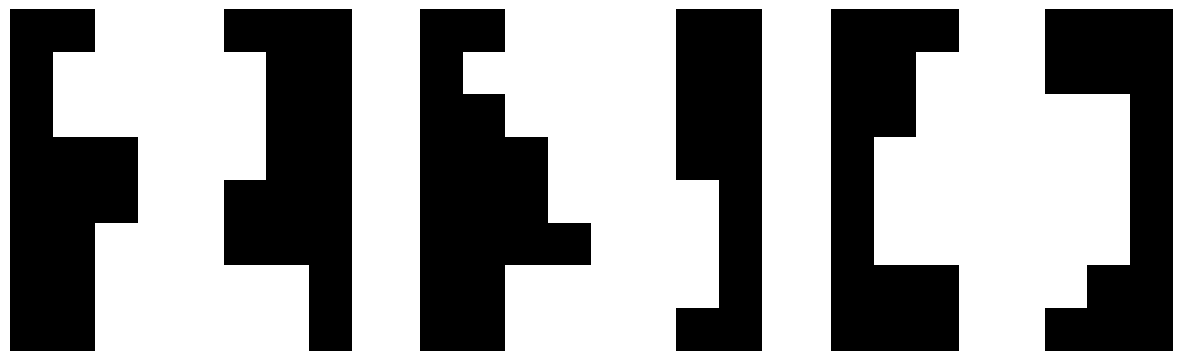

In [18]:
for i in range(3):
    for j in range(64):
        if P[i][j]<0.5:
            P[i][j]=0
        else:
            P[i][j]=1
# Visualize results
import matplotlib.pyplot as plt
labels=[2,3,4]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), dpi=100)
for i in range(3):
    ax[i].imshow(P[i].reshape(8,8), cmap='gray')
    # ax[i].set_title('Parameters class: {}\n pi = {:0.3f}'.format(labels[i], Pi[i]), fontsize=3 ** (-1) // 0.02)
    ax[i].axis('off')
plt.show()
